In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
plt.rcParams.update({'font.size':16})

In [3]:
df_t = pd.read_pickle('data/ap17_xpcont_train.pickle')
df_v = pd.read_pickle('data/ap17_xpcont_validation.pickle')

df_t.keys()

dict_keys(['bp_coef', 'rp_coef', 'labels'])

## Q1.) BP/RP Linear Regression

In [4]:
n_spec = len(df_t['bp_coef'][0])
n_train = len(df_t['bp_coef'])
n_valid = len(df_v['bp_coef'])

norm_t = np.expand_dims(df_t['rp_coef'][:,0], axis = 1)
norm_v = np.expand_dims(df_v['rp_coef'][:,0], axis = 1)

#bias_t = np.ones((n_train, 1))
bp_train = df_t['bp_coef']/norm_t
rp_train = df_t['rp_coef']/norm_t

bias_v = np.ones((n_valid,1))
bp_valid = df_v['bp_coef']/norm_v
rp_valid = df_v['rp_coef']/norm_v

pars_t = np.concatenate([bp_train, rp_train], axis = 1)
pars_v = np.concatenate([bp_valid, rp_valid], axis = 1)

In [5]:
a = (pars_t.T).dot(pars_t)
b = (pars_t.T).dot(df_t['labels'])
theta = np.linalg.solve(a, b)

In [6]:
err = np.abs((pars_v.dot(theta) - df_v['labels'])/df_v['labels'])

Median Absolute Deviation of T_eff: 1.14%
Median Absolute Deviation of Log_g: 7.14%


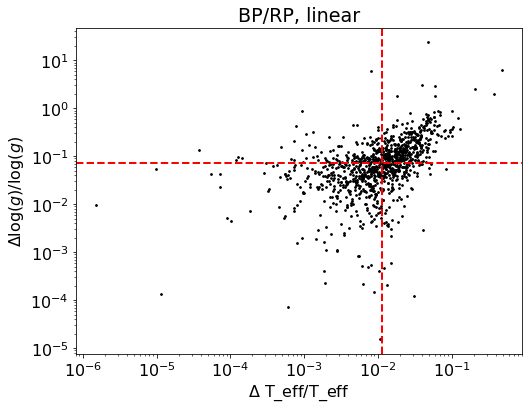

In [7]:
teff_med = np.median(err[:,0])
g_med = np.median(err[:,1])

plt.figure(figsize = (8,6))
plt.scatter(err[:,0], err[:,1], s = 3, color = 'k')
plt.yscale('log')
plt.xscale('log')
plt.axvline(teff_med, color = 'r', linestyle = '--', lw = 2)
plt.axhline(g_med, color = 'r', linestyle = '--', lw = 2)
plt.xlabel('$\Delta$ T_eff/T_eff')
plt.ylabel('$\Delta \log(g) / \log(g)$')
plt.title('BP/RP, linear')

print(f'Median Absolute Deviation of T_eff: %.3g%%'%(teff_med*100))
print(f'Median Absolute Deviation of Log_g: %.3g%%'%(g_med*100) )

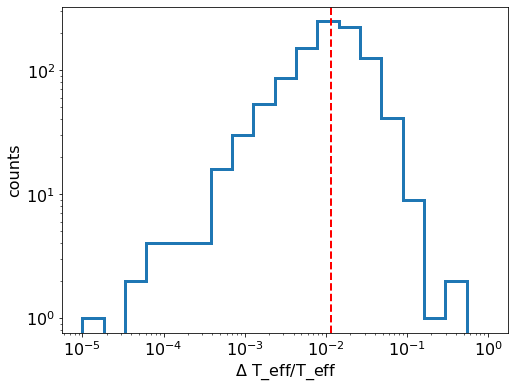

In [8]:
plt.figure(figsize = (8,6))
plt.hist(err[:,0], bins = np.logspace(-5,0,20), histtype = 'step', lw = 3)
plt.axvline(teff_med, color = 'r', linestyle = '--', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta$ T_eff/T_eff')
plt.ylabel('counts');

The linear regression using only the linear terms of BP/RP coefficient reaches a MAD percentage error of ~1% in T$_\text{eff}$.

## Q2.) RP only Linear Regression

In [9]:
rp_lin_t = rp_train
rp_lin_v = rp_valid

In [10]:
a_lin = (rp_lin_t.T).dot(rp_lin_t)
b_lin = (rp_lin_t.T).dot(df_t['labels'])
theta_lin = np.linalg.solve(a_lin, b_lin)

In [11]:
err_lin = np.abs((rp_lin_v.dot(theta_lin) - df_v['labels'])/df_v['labels'])

Median Absolute Deviation of T_eff: 1.93%
Median Absolute Deviation of Log_g: 10.7%


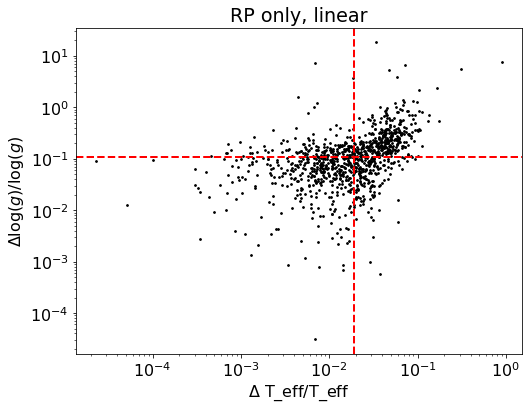

In [12]:
teff_med_lin = np.median(err_lin[:,0])
g_med_lin = np.median(err_lin[:,1])

plt.figure(figsize = (8,6))
plt.scatter(err_lin[:,0], err_lin[:,1], s = 3, color = 'k')
plt.yscale('log')
plt.xscale('log')
plt.axvline(teff_med_lin, color = 'r', linestyle = '--', lw = 2)
plt.axhline(g_med_lin, color = 'r', linestyle = '--', lw = 2)
plt.xlabel('$\Delta$ T_eff/T_eff')
plt.ylabel('$\Delta \log(g) / \log(g)$')
plt.title('RP only, linear')

print(f'Median Absolute Deviation of T_eff: %.3g%%'%(teff_med_lin*100))
print(f'Median Absolute Deviation of Log_g: %.3g%%'%(g_med_lin*100) )

The linear regression using only the linear terms of RP coefficient reaches a MAD percentage error of ~2% in T$_\text{eff}$.

In [13]:
n_quad = n_spec*(n_spec + 1)//2
count = 0
#rp_quad_t = np.zeros((n_quad, n_train))
rp_quad_t = []
rp_quad_v = []
for i in range(n_spec):
    for j in range(i,n_spec):
        #print(i)
        #ind = (n_spec-1)*i + j 
        
        #print(ind, count)
        count += 1
        #print(len(rp_train[:,i]*rp_train[:,j]))
        
        rp_quad_t.append(rp_train[:,i]*rp_train[:,j])
        rp_quad_v.append(rp_valid[:,i]*rp_valid[:,j])
        
rp_quad_t = np.transpose(rp_quad_t)
rp_quad_v = np.transpose(rp_quad_v)

In [14]:
a_quad = (rp_quad_t.T).dot(rp_quad_t)
b_quad = (rp_quad_t.T).dot(df_t['labels'])
theta_quad = np.linalg.solve(a_quad, b_quad)

In [15]:
err_quad = np.abs((rp_quad_v.dot(theta_quad) - df_v['labels'])/df_v['labels'])

Median Absolute Deviation of T_eff: 1.57%
Median Absolute Deviation of Log_g: 9.69%


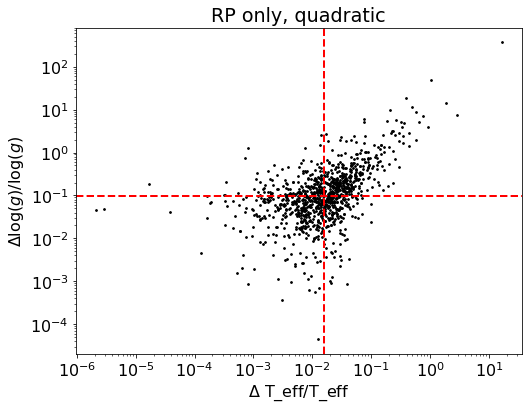

In [16]:
teff_med_quad = np.median(err_quad[:,0])
g_med_quad = np.median(err_quad[:,1])

plt.figure(figsize = (8,6))
plt.scatter(err_quad[:,0], err_quad[:,1], s = 3, color = 'k')
plt.yscale('log')
plt.xscale('log')
plt.axvline(teff_med_quad, color = 'r', linestyle = '--', lw = 2)
plt.axhline(g_med_quad, color = 'r', linestyle = '--', lw = 2)
plt.xlabel('$\Delta$ T_eff/T_eff')
plt.ylabel('$\Delta \log(g) / \log(g)$')
plt.title('RP only, quadratic')

print(f'Median Absolute Deviation of T_eff: %.3g%%'%(teff_med_quad*100))
print(f'Median Absolute Deviation of Log_g: %.3g%%'%(g_med_quad*100) )

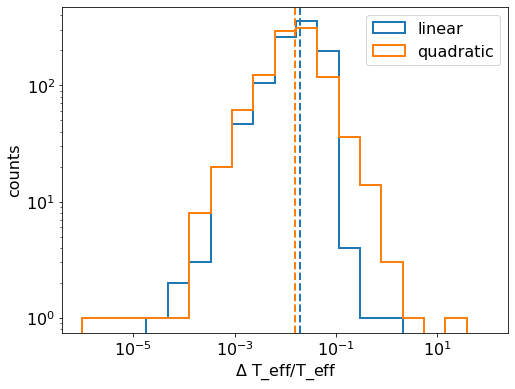

In [17]:
plt.figure(figsize = (8,6))
plt.hist(err_lin[:,0], bins = np.logspace(-6,2,20), histtype = 'step', lw = 2, label = 'linear')
plt.hist(err_quad[:,0], bins = np.logspace(-6,2,20), histtype = 'step', lw = 2, label = 'quadratic')
plt.axvline(teff_med_lin, color = 'tab:blue', linestyle = '--', lw = 2)
plt.axvline(teff_med_quad, color = 'tab:orange', linestyle = '--', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta$ T_eff/T_eff')
plt.legend()
plt.ylabel('counts');

We can see that including the the quadratic terms only marginally improved the MAD but also broadens the distribution.

In [18]:
n_cubic = n_spec*(n_spec + 1)*(n_spec + 2)//2//3
count = 0
#rp_quad_t = np.zeros((n_quad, n_train))
rp_cubic_t = []
rp_cubic_v = []
for i in tqdm(range(n_spec)):
    for j in range(i,n_spec):
        for k in range(j,n_spec):
            #print(i)
            #ind = (n_spec-1)*i + j 

            #print(ind, count)
            count += 1
            #print(len(rp_train[:,i]*rp_train[:,j]))

            rp_cubic_t.append(rp_train[:,i]*rp_train[:,j]*rp_train[:,k])
            rp_cubic_v.append(rp_valid[:,i]*rp_valid[:,j]*rp_valid[:,k])
        
rp_cubic_t = np.transpose(rp_cubic_t)
rp_cubic_v = np.transpose(rp_cubic_v)

100%|██████████| 55/55 [00:00<00:00, 63.36it/s]


In [19]:
lamb = 1e-3
a_cubic = rp_cubic_t.dot(rp_cubic_t.T)/lamb + np.identity(n_train)
pre_fac = rp_cubic_v.dot(rp_cubic_t.T)/lamb
pred = pre_fac.dot(np.linalg.solve(a_cubic, df_t['labels']))

In [20]:
err_cubic = np.abs((pred - df_v['labels'])/df_v['labels'])

Median Absolute Deviation of T_eff: 1.89%
Median Absolute Deviation of Log_g: 10.9%


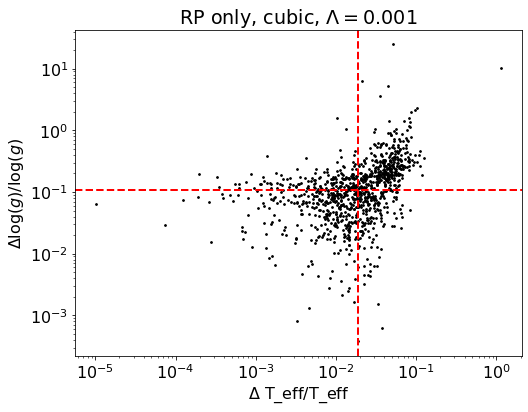

In [21]:
teff_med_cubic = np.median(err_cubic[:,0])
g_med_cubic = np.median(err_cubic[:,1])

plt.figure(figsize = (8,6))
plt.scatter(err_cubic[:,0], err_cubic[:,1], s = 3, color = 'k')
plt.yscale('log')
plt.xscale('log')
plt.axvline(teff_med_cubic, color = 'r', linestyle = '--', lw = 2)
plt.axhline(g_med_cubic, color = 'r', linestyle = '--', lw = 2)
plt.xlabel('$\Delta$ T_eff/T_eff')
plt.ylabel('$\Delta \log(g) / \log(g)$')
plt.title(f'RP only, cubic, $\Lambda = {1e-3}$')

print(f'Median Absolute Deviation of T_eff: %.3g%%'%(teff_med_cubic*100))
print(f'Median Absolute Deviation of Log_g: %.3g%%'%(g_med_cubic*100) )

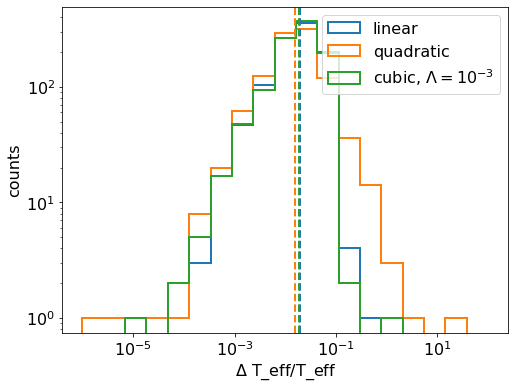

In [22]:
plt.figure(figsize = (8,6))
plt.hist(err_lin[:,0], bins = np.logspace(-6,2,20), histtype = 'step', lw = 2, label = 'linear')
plt.hist(err_quad[:,0], bins = np.logspace(-6,2,20), histtype = 'step', lw = 2, label = 'quadratic')
plt.hist(err_cubic[:,0], bins = np.logspace(-6,2,20), histtype = 'step', lw = 2, label = 'cubic, $\Lambda = 10^{-3}$')
plt.axvline(teff_med_lin, color = 'tab:blue', linestyle = '--', lw = 2)
plt.axvline(teff_med_quad, color = 'tab:orange', linestyle = '--', lw = 2)
plt.axvline(teff_med_cubic, color = 'tab:green', linestyle = '--', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta$ T_eff/T_eff')
plt.ylabel('counts')
plt.legend();

We can see that including the cubic terms with ridge regulation also only marginally improved the fit.

## Q3.) Gaussian Process

In [23]:
# read in and plot data

data = pd.read_pickle('data/data.pkl').T

t_ar = data[0]
n_obs = len(t_ar)

err_data = data[1]

data = data[2:]

In [24]:
def matern(t_ar1, t_ar2, sigma, tau):
    dt = np.abs(np.expand_dims(t_ar1, axis = 1) - t_ar2)
    return sigma**2*(1 + np.sqrt(3)*dt/tau)*np.exp(-np.sqrt(3)*dt/tau)

A natural choice for $\sigma^2$ is just the variance of the data. And since we know there is a 100 day signal in the data, I will use 100 day for the coherent time scale $\tau$

In [25]:
sigma = np.std(data[10])

tau = 100
tau_long = tau*10
tau_short = tau//100

k = matern(t_ar, t_ar , sigma = sigma, tau = tau)
k_long = matern(t_ar, t_ar , sigma = sigma, tau = tau_long)
k_short = matern(t_ar, t_ar , sigma = sigma, tau = tau_short)

In [26]:
t_pred = np.arange(-100, 1124, 0.1)

In [27]:
k_star = matern(t_pred, t_ar , sigma = sigma, tau = tau)
k_star_long = matern(t_pred, t_ar , sigma = sigma, tau = tau_long)
k_star_short = matern(t_pred, t_ar , sigma = sigma, tau = tau_short)

In [28]:
cov = np.linalg.inv(k + np.diag(err_data**2))
cov_long = np.linalg.inv(k_long + np.diag(err_data**2))
cov_short = np.linalg.inv(k_short + np.diag(err_data**2))

y_pred = k_star.dot(cov.dot(data[10]))
y_pred_long = k_star_long.dot(cov_long.dot(data[10]))
y_pred_short = k_star_short.dot(cov_short.dot(data[10]))

var_pred = sigma**2 - np.diag(k_star.dot(cov.dot(k_star.T)))
var_pred_long = sigma**2 - np.diag(k_star_long.dot(cov_long.dot(k_star_long.T)))
var_pred_short = sigma**2 - np.diag(k_star_short.dot(cov_short.dot(k_star_short.T)))

Text(0.5, 0, 'time [day]')

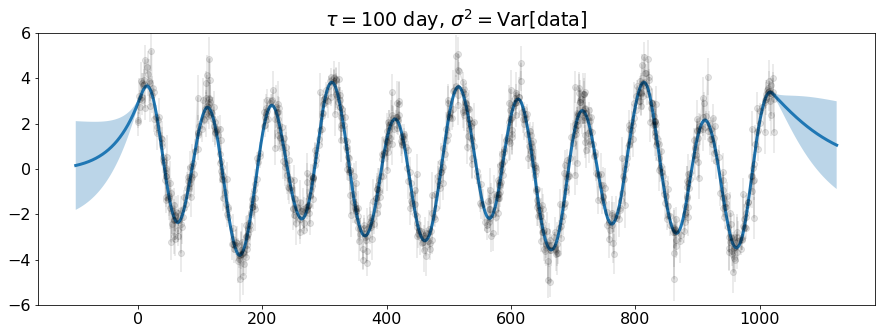

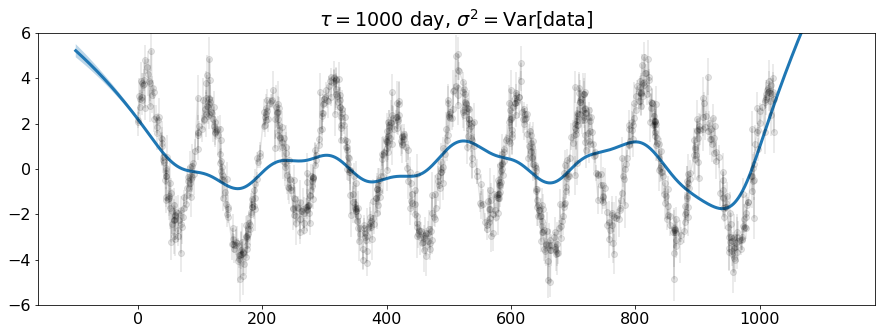

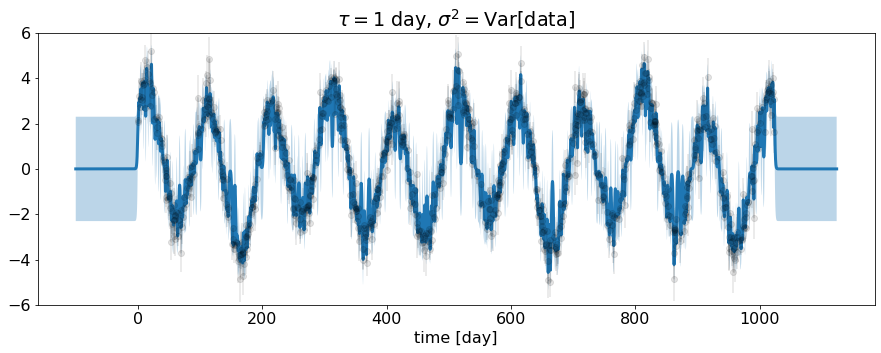

In [29]:
plt.figure(figsize=(15, 5))
plt.errorbar(t_ar, data[-1], yerr=err_data,
                color="k", marker="o", alpha=0.1)

plt.plot(t_pred, y_pred, lw = 3)
plt.fill_between(t_pred, y_pred - np.sqrt(var_pred), 
                         y_pred + np.sqrt(var_pred), alpha = .3)
plt.title(f'$\\tau = {tau}$ day, $\sigma^2 = $Var[data]')
plt.ylim(-6,6)

plt.figure(figsize=(15, 5))
plt.errorbar(t_ar, data[-1], yerr=err_data,
                color="k", marker="o", alpha=0.1)

plt.plot(t_pred, y_pred_long, lw = 3)
plt.fill_between(t_pred, y_pred_long - np.sqrt(var_pred_long), 
                         y_pred_long + np.sqrt(var_pred_long), alpha = .3)
plt.title(f'$\\tau = {tau_long}$ day, $\sigma^2 = $Var[data]')
plt.ylim(-6,6)

plt.figure(figsize=(15, 5))
plt.errorbar(t_ar, data[-1], yerr=err_data,
                color="k", marker="o", alpha=0.1)

plt.plot(t_pred, y_pred_short, lw = 3)
plt.fill_between(t_pred, y_pred_short - np.sqrt(var_pred_short), 
                         y_pred_short + np.sqrt(var_pred_short), alpha = .3)
plt.title(f'$\\tau = {tau_short}$ day, $\sigma^2 = $Var[data]')
plt.ylim(-6,6)

plt.xlabel('time [day]')

Here we can see the effect of a timescale that's too long or too short.

In [30]:
sigma_big = np.std(data[10])*10
sigma_small = np.std(data[10])/10

k_big = matern(t_ar, t_ar , sigma = sigma_big, tau = tau)
k_small = matern(t_ar, t_ar , sigma = sigma_small, tau = tau)

In [31]:
k_star_big = matern(t_pred, t_ar , sigma = sigma_big, tau = tau)
k_star_small = matern(t_pred, t_ar , sigma = sigma_small, tau = tau)

In [32]:
cov_big = np.linalg.inv(k_big + np.diag(err_data**2))
cov_small = np.linalg.inv(k_small + np.diag(err_data**2))

y_pred_big = k_star_big.dot(cov_big.dot(data[10]))
y_pred_small = k_star_small.dot(cov_small.dot(data[10]))

var_pred_big = sigma_big**2 - np.diag(k_star_big.dot(cov_big.dot(k_star_big.T)))
var_pred_small = sigma_small**2 - np.diag(k_star_small.dot(cov_small.dot(k_star_small.T)))

Text(0.5, 0, 'time [day]')

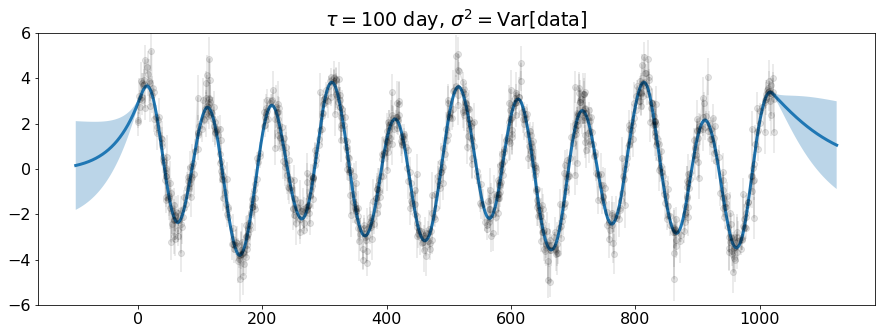

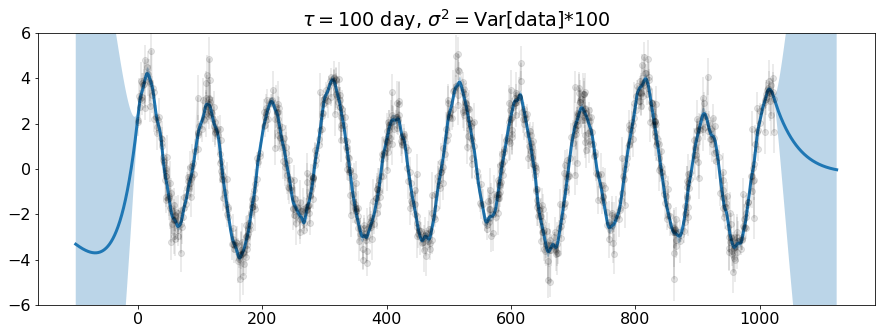

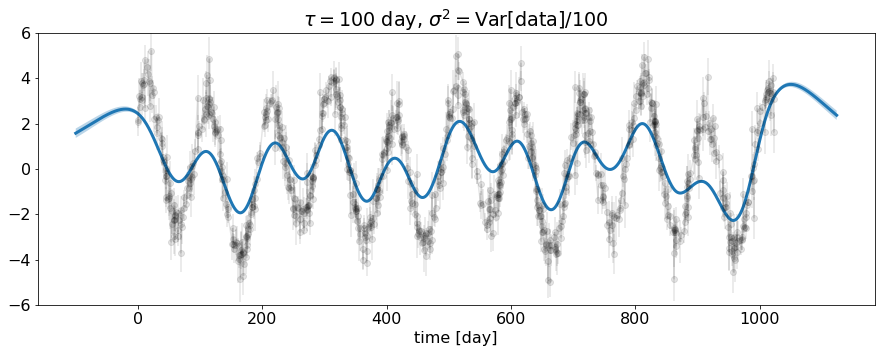

In [33]:
plt.figure(figsize=(15, 5))
plt.errorbar(t_ar, data[-1], yerr=err_data,
                color="k", marker="o", alpha=0.1)

plt.plot(t_pred, y_pred, lw = 3)
plt.fill_between(t_pred, y_pred - np.sqrt(var_pred), 
                         y_pred + np.sqrt(var_pred), alpha = .3)
plt.title(f'$\\tau = {tau}$ day, $\sigma^2 = $Var[data]')
plt.ylim(-6,6)

plt.figure(figsize=(15, 5))
plt.errorbar(t_ar, data[-1], yerr=err_data,
                color="k", marker="o", alpha=0.1)

plt.plot(t_pred, y_pred_big, lw = 3)
plt.fill_between(t_pred, y_pred_big - np.sqrt(var_pred_big), 
                         y_pred_big + np.sqrt(var_pred_big), alpha = .3)
plt.title(f'$\\tau = {tau}$ day, $\sigma^2 = $Var[data]*100')
plt.ylim(-6,6)

plt.figure(figsize=(15, 5))
plt.errorbar(t_ar, data[-1], yerr=err_data,
                color="k", marker="o", alpha=0.1)

plt.plot(t_pred, y_pred_small, lw = 3)
plt.fill_between(t_pred, y_pred_small - np.sqrt(var_pred_small), 
                         y_pred_small + np.sqrt(var_pred_small), alpha = .3)
plt.title(f'$\\tau = {tau}$ day, $\sigma^2 = $Var[data]/100')
plt.ylim(-6,6)

plt.xlabel('time [day]')

Here we can see the effect of the $\sigma^2$ that's too big or too small.